## Overlaying point-observations with expert range-maps

The two main sources of global species datasets are GBIF and IUCN. GBIF provides point-observations of species occurrences, while IUCN provides range-maps (geometrical shapes/polygons) of potential species occurrence, based on expertise.

In some situations, we may want to restrict (overlay, clip) the point-observations to the range maps area. For example, because certain point-observations are obviously wrong/inacurate, or outliers.
We will use the species **Graptemys oculifera** (turtles) as a running example, as it exists in both sources.

#### just some logging/plotting magic to output in this notebook, nothing to care about.

In [1]:
%matplotlib inline
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

## 1. Find and download all matching species data from GBIF.

In [2]:
from iSDM.species import GBIFSpecies
gbif_species = GBIFSpecies(name_species="Graptemys oculifera")
gbif_species.find_species_occurrences().head()

Loading species ... 
Number of occurrences: 164 
True
Loaded species: ['Graptemys oculifera'] 


,accessrights,associatedsequences,basisofrecord,bibliographiccitation,catalognumber,class,classkey,collectioncode,collectionid,continent,...,type,typestatus,typifiedname,verbatimcoordinatesystem,verbatimelevation,verbatimeventdate,verbatimlocality,verbatimtaxonrank,vernacularname,year
0,NaN,NaN,UNKNOWN,NaN,172126,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,NaN,2013-05-27,NaN,NaN,NaN,2013.0
1,NaN,NaN,UNKNOWN,NaN,166440,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,NaN,2010-05-20,NaN,NaN,NaN,2010.0
2,NaN,NaN,UNKNOWN,NaN,34-789,Reptilia,358,LA-NHP,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0
3,NaN,NaN,UNKNOWN,NaN,166433,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,NaN,2008-05-26,NaN,NaN,NaN,2008.0
4,NaN,NaN,UNKNOWN,NaN,166434,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,NaN,2008-05-26,NaN,NaN,NaN,2008.0


In [3]:
gbif_species.save_data()

Saved data: /home/daniela/git/iSDM/notebooks/Graptemys oculifera2443106.pkl 
Type of data: <class 'pandas.core.frame.DataFrame'> 


### Let's get a general idea of where the species is distributed on the map

Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


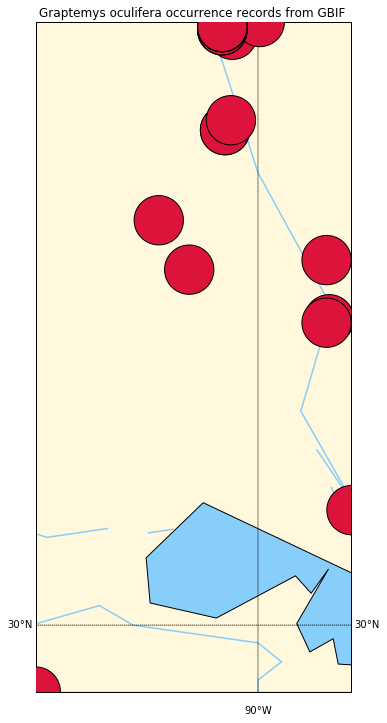

In [4]:
gbif_species.plot_species_occurrence()

#### The map is always zoomed to the species borders.

**Notice** the information *"Points with NaN coordinnates ignored."* Some records may be missing the most essential latitude/longitude information, and those are filtered out in the process of plotting. To explicitely filter such records out, you can also do:

In [5]:
gbif_species.geometrize(dropna=True) # converts the lat/lon columns into a geometrical Point, for each record

Data geometrized: converted into GeoPandas dataframe.
Points with NaN coordinnates ignored. 


In [6]:
gbif_species.get_data().head() # notice the last 'geometry' column added now

,accessrights,associatedsequences,basisofrecord,bibliographiccitation,catalognumber,class,classkey,collectioncode,collectionid,continent,...,typestatus,typifiedname,verbatimcoordinatesystem,verbatimelevation,verbatimeventdate,verbatimlocality,verbatimtaxonrank,vernacularname,year,geometry
0,NaN,NaN,UNKNOWN,NaN,172126,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,2013-05-27,NaN,NaN,NaN,2013.0,POINT (-90.36156 31.26969)
1,NaN,NaN,UNKNOWN,NaN,166440,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,2010-05-20,NaN,NaN,NaN,2010.0,POINT (-90.25060999999999 31.11566)
3,NaN,NaN,UNKNOWN,NaN,166433,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,2008-05-26,NaN,NaN,NaN,2008.0,POINT (-90.09295 31.84567)
4,NaN,NaN,UNKNOWN,NaN,166434,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,2008-05-26,NaN,NaN,NaN,2008.0,POINT (-89.99353000000001 31.88526)
5,NaN,NaN,UNKNOWN,NaN,159534,Reptilia,358,Herp,NaN,NORTH_AMERICA,...,NaN,NaN,NaN,NaN,2008-06-18,NaN,NaN,NaN,2008.0,POINT (-89.65921 30.36236)


In [7]:
gbif_species.get_data().shape # there are 40 records left (containing lat/lon) at this point.

(40, 119)

## 2. Load data from IUCN, and find particular species.

In [8]:
from iSDM.species import IUCNSpecies
iucn_species = IUCNSpecies(name_species='Graptemys oculifera')
iucn_species.load_shapefile('../data/FW_TURTLES/FW_TURTLES.shp')

Loading data from: ../data/FW_TURTLES/FW_TURTLES.shp
The shapefile contains data on 181 species.


There are rangemaps for 181 species. Lets filter out only those for our turtles.

In [9]:
iucn_species.find_species_occurrences()  # IUCN datasets have a 'geometry' column

Loaded species: ['Graptemys oculifera'] 


,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
6,Graptemys oculifera,VU,CRF,REPTILIA,Rhodin,None,EMYDIDAE,Graptemys,POLYGON ((-89.12554931640625 33.19378662109375...,9499.0,...,1.0,1.0,2.01769,10.636744,CBFTT,oculifera,None,None,None,2013.0


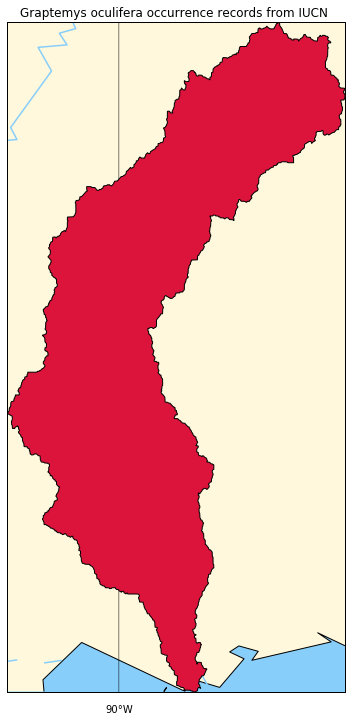

In [10]:
iucn_species.plot_species_occurrence() # the rangemap seems to be around the same area as the point-records

### Finally, let's overlay the point-records with the range-maps. This will filter-out only the point records that belong to the rangemap area.

Just for backup, lets copy the records before filtering out.

In [11]:
backup_gbif_species = gbif_species.get_data().copy()

In [12]:
gbif_species.overlay(iucn_species)

Overlayed species occurrence data with the given range map.


How many records are left after filtering out?

In [13]:
gbif_species.get_data().shape # 39 records, so one unlucky observation falls outside the rangemap

(39, 119)

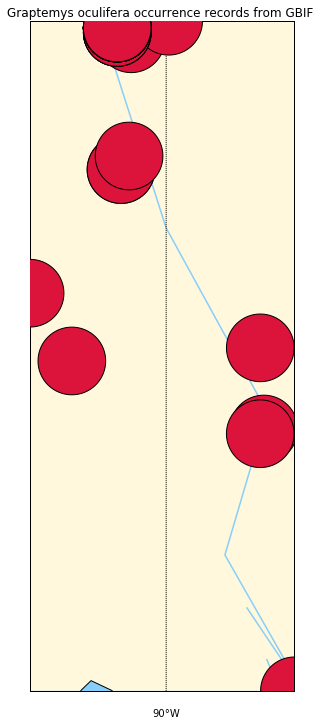

In [14]:
gbif_species.plot_species_occurrence()

It seems like the bottom-left point from above (In [4]), was removed.

It's easy to plot both filtered datasets (IUCN and GBIF) on a single map. They are both geopandas datastructures, so they have a **geometry** column, which is all we need. Geometries can be directly plotted with *.plot()*

In [15]:
gbif_species_geometry = gbif_species.get_data().geometry
iucn_species_geometry = iucn_species.get_data().geometry

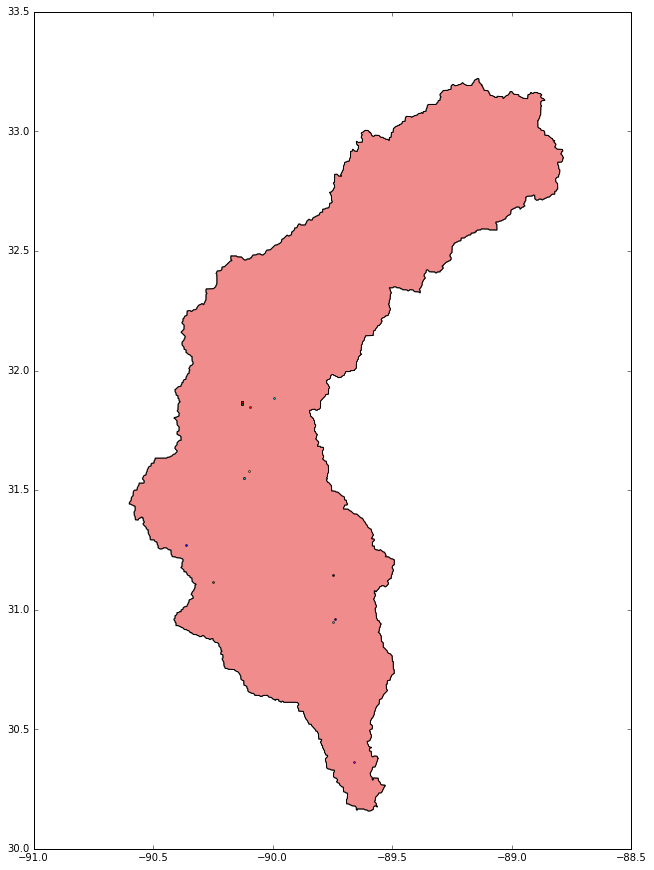

In [62]:
from geopandas import GeoSeries
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
combined_geometries = GeoSeries(gbif_species_geometry.append(iucn_species_geometry))
combined_geometries.plot()

In [56]:
gbif_species_geometry.head()

0             POINT (-90.36156 31.26969)
1    POINT (-90.25060999999999 31.11566)
3             POINT (-90.09295 31.84567)
4    POINT (-89.99353000000001 31.88526)
5             POINT (-89.65921 30.36236)
Name: geometry, dtype: object

In [57]:
iucn_species_geometry.head()

6    POLYGON ((-89.12554931640625 33.19378662109375...
Name: geometry, dtype: object

Remember we backed up the GBIF data before overlaying, so let's also map it together with the rangemap, to see exactly what got left out.

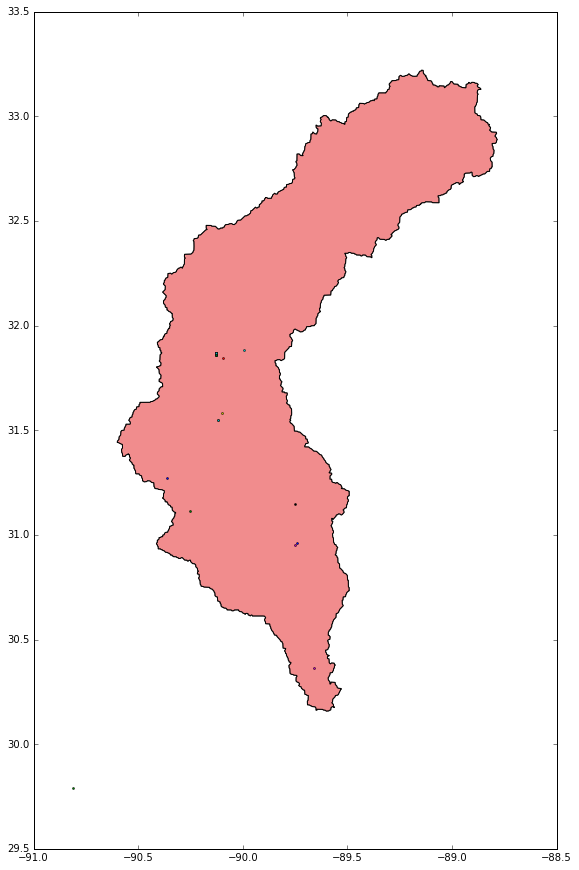

In [63]:
combined_geometries = GeoSeries(backup_gbif_species.geometry.append(iucn_species_geometry))
plt.figure(figsize=(15,15))
combined_geometries.plot()

### See that point in the lower-left corner?